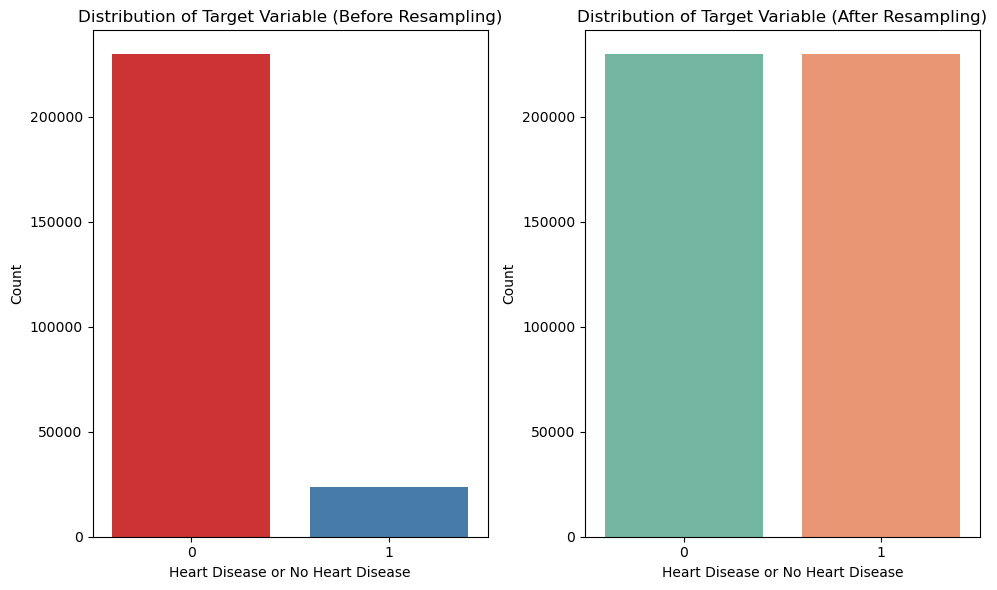

Random Forest Accuracy: 0.8962193330794757
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89     45888
           1       0.86      0.94      0.90     46027

    accuracy                           0.90     91915
   macro avg       0.90      0.90      0.90     91915
weighted avg       0.90      0.90      0.90     91915



C:\Users\SAJJA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

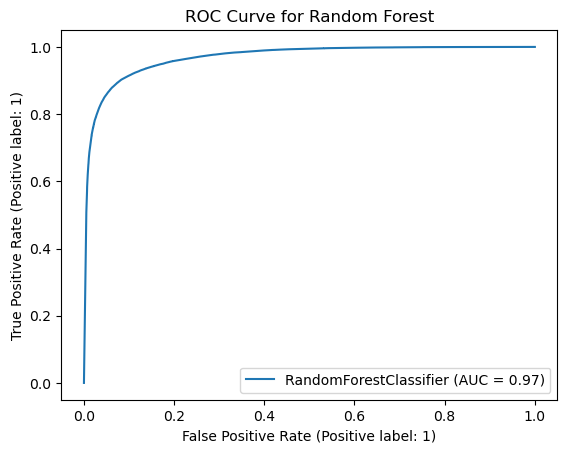

C:\Users\SAJJA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

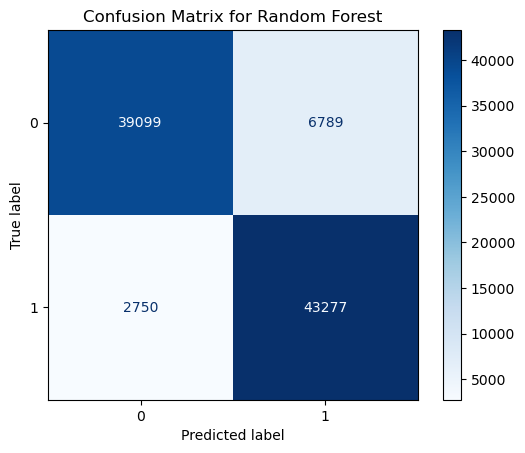

C:\Users\SAJJA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


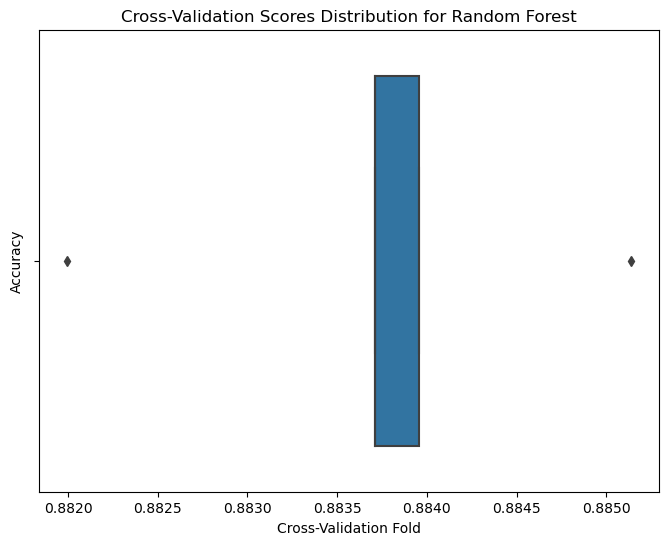

Random Forest Cross-Validation Scores: [0.88371049 0.88199695 0.88395528 0.88513844 0.88370891]
Mean CV Score for Random Forest: 0.8837020173772286


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import joblib

# Load the dataset
df = pd.read_excel('heart_disease_health_indicators_BRFSS2015.xlsx')

# Define features (X) and target variable (y)
X = df.drop('HeartDiseaseorAttack', axis=1)  # Features are all columns except 'HeartDiseaseorAttack'
y = df['HeartDiseaseorAttack']  # Target variable is 'HeartDiseaseorAttack'

# Manage class imbalance using SMOTE oversampling and RandomUnderSampler
oversampler = SMOTE()
undersampler = RandomUnderSampler()

X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)
# Plotting the distribution of target variable before and after resampling
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='Set1')
plt.title('Distribution of Target Variable (Before Resampling)')
plt.xlabel('Heart Disease or No Heart Disease')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Distribution of Target Variable (After Resampling)')
plt.xlabel('Heart Disease or No Heart Disease')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fine-tune the Random Forest model parameters to further improve performance.

# Define the parameter grid for grid search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Train the Random Forest model with the best parameters
rf_classifier = RandomForestClassifier(**best_params_rf)
rf_classifier.fit(X_train, y_train)

# Predictions using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Accuracy metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print accuracy metrics for Random Forest
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)

# Save the Random Forest model
joblib.dump(rf_classifier, 'random_forest_model_gridsearch.pkl')

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plot_roc_curve(rf_classifier, X_test, y_test)
plt.title('ROC Curve for Random Forest')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
plot_confusion_matrix(rf_classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Evaluate the model's robustness through cross-validation techniques.

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Plot cross-validation scores for Random Forest
plt.figure(figsize=(8, 6))
sns.boxplot(cv_scores_rf)
plt.title('Cross-Validation Scores Distribution for Random Forest')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.show()

# Print cross-validation scores for Random Forest
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score for Random Forest:", np.mean(cv_scores_rf))


In [ ]:
from sklearn.svm import SVC

# Fine-tune the SVM model parameters to further improve performance.

# Define the parameter grid for grid search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform grid search for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters for SVM
best_params_svm = grid_search_svm.best_params_

# Train the SVM model with the best parameters
svm_classifier = SVC(**best_params_svm)
svm_classifier.fit(X_train, y_train)

# Predictions using SVM
y_pred_svm = svm_classifier.predict(X_test)

# Accuracy metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print accuracy metrics for SVM
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_rep_svm)

# Save the SVM model
joblib.dump(svm_classifier, 'svm_model.pkl')

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
plot_confusion_matrix(svm_classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Plot cross-validation scores for SVM
plt.figure(figsize=(8, 6))
sns.boxplot(cv_scores_svm)
plt.title('Cross-Validation Scores Distribution for SVM')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.show()

# Print cross-validation scores for SVM
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("Mean CV Score for SVM:", np.mean(cv_scores_svm))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fine-tune the KNN model parameters to further improve performance.

# Define the parameter grid for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters for KNN
best_params_knn = grid_search_knn.best_params_

# Train the KNN model with the best parameters
knn_classifier = KNeighborsClassifier(**best_params_knn)
knn_classifier.fit(X_train, y_train)

# Predictions using KNN
y_pred_knn = knn_classifier.predict(X_test)

# Accuracy metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print accuracy metrics for KNN
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_rep_knn)

# Save the KNN model
joblib.dump(knn_classifier, 'knn_model.pkl')

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
plot_confusion_matrix(knn_classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.show()

# Cross-validation for KNN
cv_scores_knn = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Plot cross-validation scores for KNN
plt.figure(figsize=(8, 6))
sns.boxplot(cv_scores_knn)
plt.title('Cross-Validation Scores Distribution for KNN')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.show()

# Print cross-validation scores for KNN
print("KNN Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Score for KNN:", np.mean(cv_scores_knn))
